# Vanilla Support Vector Machines, Grid Search, Movie Review Classifier


**Acknowledgment**: Noah Smith, Chris Ketelsen, Chenhao Tan

Name: Toshal Ghimire

In [2]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

In this assignment you'll explore the primal and dual representations of support vector machines,
as well as explore the performance of various kernels while classifying sentiments.

Basic concepts of SVM
---

**Part A**: 
* What are the main differences between the primal and the dual representations?
* For $\xi$, $C$, $\alpha$, and $\beta$, what is their role and if there is a special value what is the value and what does it mean?

* For every primal problem there is a dual problem in linear programing.
suppose the primal problem is to minimize to satisfy some constraints, the corrsponding dual problem would have us maximize to satisfy some constraints. The transposed of the primal representations will result in the dual representations.The main diffrence between the two is the fact that if one problem is to maximize, the corrsponding dual problem will be to minimize, and vice versa

<br>

* $\xi$ is the slack variable ($\xi \ge 0$). It is used when the data set is not linearly separable. Its role is to allow the classifier to accept some features that are on the wrong end of the hyperplane. 


<br>

* $C$ is a paramater that controls the *(regularization)* tradeoff between a smooth (linear) decision boundary and classifing training points correctly (greater test error). It is used to determine eactly how hard or how soft margin your SVM is. Large values of $C$ will result in  a smaller margin for its hyperplane, and small values of C will result in larger margin for its hyperplane. 

<br>

* $\alpha$ is a variable that is used when converting a primal problem to a dual problem. it is a langrange multiper variable that is used to maximize the feasbility of the weights for the dual problem. It is like the Parmater C but for the dual problem

<br>

* $\beta$ is a paramater that is a multiplyer for $\xi$ and must be greater than 0.
 according to the slides: $\alpha_i$ + $\beta_i$  =  $C$. this means we can use both alpha and beta to find C.




# The Dataset
$$ $$

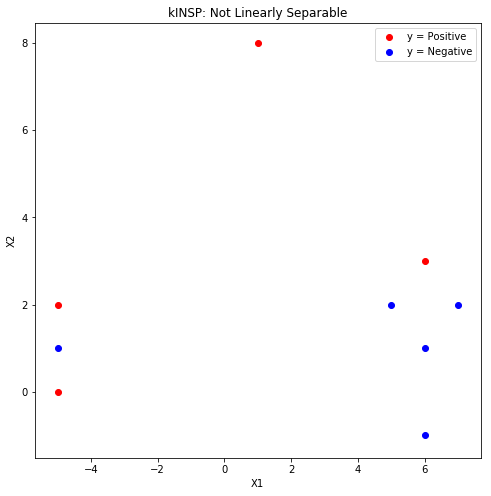

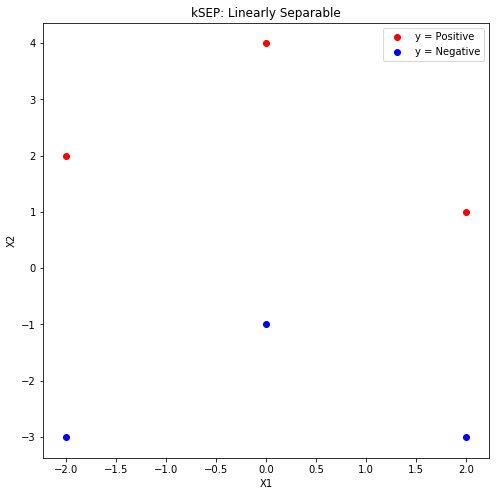

In [3]:
kINSP = np.array([(1, 8, +1),
               (7, 2, -1),
               (6, -1, -1),
               (-5, 0, +1),
               (-5, 1, -1),
               (-5, 2, +1),
               (6, 3, +1),
               (6, 1, -1),
               (5, 2, -1)])

kSEP = np.array([(-2, 2, +1),    # 0 - A
              (0, 4, +1),     # 1 - B
              (2, 1, +1),     # 2 - C
              (-2, -3, -1),   # 3 - D
              (0, -1, -1),    # 4 - E
              (2, -3, -1),    # 5 - F
              ])


def plotArray(Data):
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8,8))
    x1_pos = []
    x2_pos = []

    x1_neg = []
    x2_neg = []
    for i in Data:
        if i[2]==1:
            x1_pos.append(i[0])
            x2_pos.append(i[1])

        if i[2]==-1:
            x1_neg.append(i[0])
            x2_neg.append(i[1])
        
    
    ax.scatter(x1_pos,x2_pos,color="red",label="y = Positive")
    ax.scatter(x1_neg,x2_neg,color="blue",label="y = Negative")
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    
    
    if(len(Data) == 6):
        ax.set_title("kSEP: Linearly Separable")
    else:
        ax.set_title("kINSP: Not Linearly Separable")
    ax.legend()
    
    
plotArray(kINSP)
plotArray(kSEP)

**PART B**: 

 * Given a weight vector, implement the *find_support* function that returns the indices of the support vectors.
 * Given a weight vector, implement the *find_slack* function that returns the indices of the vectors with nonzero slack.
 * Given the alpha dual vector, implement the *weight_vector* function that returns the corresponding weight vector.

In [4]:
import numpy as np

kINSP = np.array([(1, 8, +1),
               (7, 2, -1),
               (6, -1, -1),
               (-5, 0, +1),
               (-5, 1, -1),
               (-5, 2, +1),
               (6, 3, +1),
               (6, 1, -1),
               (5, 2, -1)])

kSEP = np.array([(-2, 2, +1),    # 0 - A
              (0, 4, +1),     # 1 - B
              (2, 1, +1),     # 2 - C
              (-2, -3, -1),   # 3 - D
              (0, -1, -1),    # 4 - E
              (2, -3, -1),    # 5 - F
              ])


def weight_vector(x, y, alpha):
    """
    Given a vector of alphas, compute the primal weight vector w.
    The vector w should be returned as an Numpy array.
    """

    w = np.zeros(len(x[0]))
    w = np.dot(alpha*y,x)
    
    return w



def find_support(x, y, w, b, tolerance=0.001):
    """
    Given a set of training examples and primal weights, return the indices
    of all of the support vectors as a set.
    """    
    
    ROUND = len(str(tolerance)) -2
    
    SV_indices = []
    for i in range(len(x)):
        F = np.dot(w,x[i]) + b
        if round(F,ROUND) == 1 or round(F,ROUND) == -1.0:
            SV_indices.append(i)
            
    support = set(SV_indices)

    return support



def find_slack(x, y, w, b):
    """
    Given a set of training examples and primal weights, return the indices
    of all examples with nonzero slack as a set.
    """
   
    slack_indices = []
    for i in range(len(x)):
        F = np.dot(w,x[i]) + b
        
        #checking if feature set x_i is misclasifed 
        if(y[i] == -1 and F > -1):
            slack_indices.append(i)
        
        if(y[i] == 1 and F < 1):
            slack_indices.append(i)
            
        
          
    slack = set(slack_indices)
    return slack

In [5]:
%run -i tests/tests4.py

....
----------------------------------------------------------------------
Ran 4 tests in 0.012s

OK


<Figure size 432x288 with 0 Axes>

**PART C**

The goal of this problem is to correctly classify test data points, given a training data set.
For this problem, assume that we are training an SVM with a quadratic kernel– that is, our kernel function is a polynomial kernel of degree 2. You are given the data set presented in Figure 1. The slack penalty C will determine the location of the decision boundary.

Justify the following questions in a sentence or via drawing decision boundary.
![training_data](./data/data.png)



* **Where would the decision boundary be for very large values of C ?**

When $C$ is very large, we expect the dicision boundary to be very close in between the data points classified as **green** and the **two red** data points. Since in the case of high C value, we expect the margin to be minimized. it will perfectly fit the training set. So the decision boundary will be more like a circle that sourrounds the green points

* **Where you would expect the decision boundary to be if  C = 0?**

When $C$ = 0, it would be out of its bounds, and it would elmianate the slack term completealy meaning that we would not have a line at all

* **Which of the two cases above would you expect to generalize better on test data? Why?**

By defaut we would want to use the larger of the two, since C=0 is not possible. In general We want to have a lower C value beacuse with high C values we fit the training data near-perfecty, but this would not generalize in the case of the testing set. So having the decision boundary that maximizes margin would result in higher test accuracy. 

Support Vector Machines with Sklearn
---

In this problem, you are going to get familiar with important practical functions in scikit-learn such as pipeline, grid search, and cross validation. You will experiment with these using support vector machines.

Note that grid search can take some time on your laptop, so make sure that your code is correct with a small subset of the training data and search a reasonable number of options.

* Use the Sklearn implementation of support vector machines to train a classifier to distinguish Positive and negative sentiments
* Experiment with linear, polynomial, and RBF kernels. In each case, perform a GridSearch to help determine optimal hyperparameters for the given model (e.g. C for linear kernel, C and p for polynomial kernel, and C and  for RBF). Comment on the experiments you ran and optimal hyperparameters you found.
Hint: http://scikit-learn.org/stable/modules/grid_search.html
* Comment on classification performance for each model for optimal parameters by testing on a hold-out set.

Following is a dataset containing reviews and sentiments associated with it.

Create a SVM Classifier to predict positive or negative sentiments

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold
reviews  = pd.read_csv('./data/reviews.csv')
train, test = train_test_split(reviews, test_size=0.2, random_state=4622)
X_train = train['reviews'].values
X_test = test['reviews'].values
y_train = train['sentiment']
y_test = test['sentiment']


'i first saw  breaking glass  in      and thought that it would be one of the  movie classics  . this film is a great look into the music industry with a great cast of performers . this is one film that should be in the collection of everyone and any one that wants to get into the music industry . i can  t wait for it to be available on dvd .  '

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import svm
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score

**PART A**

Use CountVectorizer to vectorize reviews as dictionary of term frequencies.
Define the crossvalidation split using StratifiedKFold.

In [8]:
firstGrid_search = None

In [9]:
def tokenize(text): 
    tknzr = TweetTokenizer()
    return tknzr.tokenize(text)

en_stopwords = set(stopwords.words("english")) 


# CREATE CountVectorizer using sklearn.feature_extraction.text.CountVectorizer
# Hint: use the above tokenize function ================> tokenizer creates 47 extra features, all are ".",is needed??
# Hint: play with different parameters, in particular, min_df can help with generalizability

vectorizer = CountVectorizer(stop_words=en_stopwords, tokenizer=lambda key: tokenize(key),min_df=3) ## Feature size is 32772
##vectorizer = CountVectorizer(stop_words=en_stopwords) ## Feature size is 32725

## NOTE: Increasing value for the paramater "min_df" decreases the overall number of features 

# split dataset using StratifiedKFold into 5 splits using sklearn.model_selection.StratifiedKFold.
# YOUR CODE HERE
skf = StratifiedKFold(n_splits=5)



**PART B**
* Create pipeline with Count Vectorizer and SVM Classifier
* Define grid search parameters
* Create GridSearchCV object with pipeline created and fit the data.
* Compute accuracy on best estimator from GridSearchCV

In [10]:
# DEFINE GRID SEARCH PARAMETERS kernel, C, degree, gamma respectively
# YOUR CODE HERE

'''
parameters = [{'classifier_kernel': ['rbf'], 'classifier_gamma': [1e-3, 1e-4],
                     'classifier_C': [1, 10, 100, 1000],'classifier_degree':[1,2,3]},
             {'classifier_kernel': ['linear'], 'classifier_C': [1, 10, 100, 1000]}]

'''

parameter = [
  {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__kernel': ['linear']},
  {'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'classifier__gamma': [0.01,0.001, 0.0001],'classifier__degree':[1,2,3,4], 'classifier__kernel': ['rbf']},
]


In [11]:
from joblib import Parallel
import multiprocessing

import time

from sklearn.externals.joblib import parallel_backend

##pipeline.get_params().keys()

In [12]:
np.random.seed(1234)
# Define pipeline using make_pipeline with vectorizer and SVM Classifier


pipeline = Pipeline([
    ('vectorizer',vectorizer),
    ('classifier',svm.SVC())
])



# Create GridSearchCV with pipeline and grid search parameters, scoring as accuracy.
# for example grid_svm = GridSearchCV(pipeline, param_grid, cv, scoring="accuracy")
grid_svm = GridSearchCV(pipeline, parameter,scoring="accuracy",cv=skf,verbose=3,n_jobs=3)


# Timer
t0 = time.time()

# For debugging purposes, it makes sense to use a smaller set of training set to speed up the grid search progress

with parallel_backend('threading'):
    grid_svm.fit(X_train, y_train)


t1 = time.time()
total = t1-t0

print("GRID SEARCH RESULTS, Time - ",total,"\n\n",grid_svm.cv_results_ )

Fitting 5 folds for each of 91 candidates, totalling 455 fits
[CV] classifier__C=0.001, classifier__kernel=linear ..................[CV] classifier__C=0.001, classifier__kernel=linear ..................
[CV] classifier__C=0.001, classifier__kernel=linear ..................



[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


[CV]  classifier__C=0.001, classifier__kernel=linear, score=0.815230961298377, total=  24.6s
[CV] classifier__C=0.001, classifier__kernel=linear ..................
[CV]  classifier__C=0.001, classifier__kernel=linear, score=0.82375, total=  24.9s
[CV] classifier__C=0.001, classifier__kernel=linear ..................
[CV]  classifier__C=0.001, classifier__kernel=linear, score=0.84375, total=  25.4s
[CV] classifier__C=0.01, classifier__kernel=linear ...................
[CV]  classifier__C=0.01, classifier__kernel=linear, score=0.867665418227216, total=  18.9s
[CV] classifier__C=0.01, classifier__kernel=linear ...................
[CV]  classifier__C=0.001, classifier__kernel=linear, score=0.83, total=  22.2s
[CV] classifier__C=0.01, classifier__kernel=linear ...................
[CV]  classifier__C=0.001, classifier__kernel=linear, score=0.8135168961201502, total=  23.1s
[CV] classifier__C=0.01, classifier__kernel=linear ...................
[CV]  classifier__C=0.01, classifier__kernel=line

[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:  5.2min


[CV]  classifier__C=100, classifier__kernel=linear, score=0.85625, total=  20.3s
[CV] classifier__C=100, classifier__kernel=linear ....................
[CV]  classifier__C=100, classifier__kernel=linear, score=0.85875, total=  16.7s
[CV] classifier__C=1000, classifier__kernel=linear ...................
[CV]  classifier__C=100, classifier__kernel=linear, score=0.85875, total=  19.6s
[CV] classifier__C=1000, classifier__kernel=linear ...................
[CV]  classifier__C=100, classifier__kernel=linear, score=0.8285356695869838, total=  19.5s
[CV] classifier__C=1000, classifier__kernel=linear ...................
[CV]  classifier__C=1000, classifier__kernel=linear, score=0.8551810237203495, total=  19.6s
[CV] classifier__C=1000, classifier__kernel=linear ...................
[CV]  classifier__C=1000, classifier__kernel=linear, score=0.85625, total=  18.9s
[CV] classifier__C=1000, classifier__kernel=linear ...................
[CV]  classifier__C=1000, classifier__kernel=linear, score=0.858

[CV]  classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf, score=0.5006242197253433, total=  25.6s
[CV] classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf, score=0.50125, total=  23.3s
[CV] classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf, score=0.50125, total=  24.4s
[CV] classifier__C=0.001, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf, score=0.50125, total=  24.7s
[CV] classifier__C=0.001, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=0.001, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf, sc

[CV]  classifier__C=0.01, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.50125, total=  22.9s
[CV] classifier__C=0.01, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.50125, total=  23.6s
[CV] classifier__C=0.01, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.50125, total=  22.7s
[CV] classifier__C=0.01, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.5006257822277848, total=  23.5s
[CV] classifier__C=0.01, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf, 

[Parallel(n_jobs=3)]: Done 122 tasks      | elapsed: 27.9min


[CV]  classifier__C=0.01, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.50125, total=  28.1s
[CV] classifier__C=0.01, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.50125, total=  26.0s
[CV] classifier__C=0.01, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.5006257822277848, total=  28.4s
[CV] classifier__C=0.01, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf, score=0.5006242197253433, total=  28.1s
[CV] classifier__C=0.01, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.01, classifier__degree=3, classifier__gamma=0.01, classifier__kernel=r

[CV]  classifier__C=0.1, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf, score=0.5769712140175219, total=  24.1s
[CV] classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.6779026217228464, total=  25.7s
[CV] classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.65125, total=  21.7s
[CV] classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.69625, total=  24.2s
[CV] classifier__C=0.1, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, sc

[CV]  classifier__C=0.1, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.50125, total=  27.0s
[CV] classifier__C=0.1, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.50125, total=  27.1s
[CV] classifier__C=0.1, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.50125, total=  22.1s
[CV] classifier__C=0.1, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.5006257822277848, total=  26.0s
[CV] classifier__C=0.1, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=0.1, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf, score=0.6292

[CV]  classifier__C=1, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=rbf, score=0.7684605757196495, total=  25.7s
[CV] classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf, score=0.8227215980024969, total=  22.1s
[CV] classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=2, classifier__gamma=0.01, classifier__kernel=rbf, score=0.80375, total=  27.8s
[CV] classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf, score=0.83625, total=  20.3s
[CV] classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf, score=0.8425, total=  

[CV]  classifier__C=1, classifier__degree=4, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.66125, total=  22.6s
[CV] classifier__C=1, classifier__degree=4, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=4, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.665, total=  25.6s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=4, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.6675, total=  25.0s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=1, classifier__degree=4, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.6545682102628285, total=  21.5s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf, score=0.8214731585518102, tot

[Parallel(n_jobs=3)]: Done 282 tasks      | elapsed: 66.1min


[CV]  classifier__C=10, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.875, total=  18.1s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.87, total=  21.1s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf, score=0.8635794743429287, total=  21.3s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.8414481897627965, total=  18.2s
[CV] classifier__C=10, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=1, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.84

[CV]  classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf, score=0.8214731585518102, total=  22.5s
[CV] classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf, score=0.8075, total=  25.1s
[CV] classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf, score=0.81, total=  24.5s
[CV] classifier__C=10, classifier__degree=4, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf, score=0.81875, total=  21.7s
[CV] classifier__C=10, classifier__degree=4, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=10, classifier__degree=4, classifier__gamma=0.01, classifier__kernel=rbf, score=0.7872340425531915, total= 

[CV]  classifier__C=100, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf, score=0.86375, total=  19.4s
[CV] classifier__C=100, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=100, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf, score=0.8625, total=  18.3s
[CV] classifier__C=100, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=100, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.8689138576779026, total=  15.3s
[CV] classifier__C=100, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=100, classifier__degree=2, classifier__gamma=0.001, classifier__kernel=rbf, score=0.8435544430538173, total=  20.4s
[CV] classifier__C=100, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=100, classifier__degree=2, classifier__gamma=0.0001, classifier__kernel=rb

[CV]  classifier__C=100, classifier__degree=4, classifier__gamma=0.0001, classifier__kernel=rbf, score=0.8623279098873592, total=  20.5s
[CV] classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf, score=0.8202247191011236, total=  24.7s
[CV] classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf, score=0.8025, total=  23.9s
[CV] classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf, score=0.80625, total=  22.8s
[CV] classifier__C=1000, classifier__degree=1, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=1, classifier__gamma=0.01, classifier__kernel=rbf, s

[CV]  classifier__C=1000, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf, score=0.85375, total=  20.3s
[CV] classifier__C=1000, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf, score=0.85875, total=  24.0s
[CV] classifier__C=1000, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf, score=0.8625, total=  24.3s
[CV] classifier__C=1000, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=3, classifier__gamma=0.001, classifier__kernel=rbf, score=0.83729662077597, total=  22.3s
[CV] classifier__C=1000, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf 
[CV]  classifier__C=1000, classifier__degree=3, classifier__gamma=0.0001, classifier__kernel=rbf, sco

[Parallel(n_jobs=3)]: Done 455 out of 455 | elapsed: 99.7min finished


GRID SEARCH RESULTS, Time -  5999.536087274551 

 {'mean_fit_time': array([19.70478253, 14.20318451, 15.60112014, 15.3967864 , 16.3814117 ,
       15.19117956, 15.65757918, 21.56079154, 22.52139783, 19.92629647,
       20.25381956, 18.82564111, 19.31753039, 19.11506429, 18.38981142,
       18.93136344, 19.21260982, 18.15443511, 19.35936737, 19.72079244,
       18.32937317, 20.01257229, 20.32563076, 19.38913403, 22.25905657,
       19.59378023, 21.63493237, 20.71359019, 20.06353478, 19.43442416,
       21.5822722 , 20.26539497, 19.23574872, 20.32782779, 19.18727832,
       20.18142018, 20.67110415, 20.0136683 , 19.13641467, 20.9513598 ,
       19.33786917, 19.38235731, 18.99897609, 19.93507814, 17.36076403,
       18.3840302 , 20.00469246, 17.39984722, 19.44717712, 18.39080853,
       17.84985604, 18.99579144, 19.05902243, 18.89724793, 19.59617915,
       18.86753154, 16.24175777, 15.51290708, 19.29977789, 15.97147417,
       16.33131175, 19.17990651, 14.29555669, 15.0159369 , 18.891668

In [15]:
print("best params:")
print(grid_svm.best_params_)

print("best cv score:")
print(grid_svm.best_score_)

best params:
{'classifier__C': 10, 'classifier__degree': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
best cv score:
0.8735


In [16]:
def report_results(model, X, y):
    pred = model.predict(X)        
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [17]:
report_results(grid_svm.best_estimator_, X_test, y_test)

{'f1': 0.8811881188118813,
 'acc': 0.88,
 'precision': 0.8657587548638133,
 'recall': 0.8971774193548387}

**PART C**

Explain the overall procedure and report the final result that you obtain including which kernel and hyperparameter was chosen.

After learning the sklearn API i realized that the actual code for this was very simple. It only takes about 10 to 15 lines of code to do everything. The hardest part was to actualy learn what a pipeline, gridSearch, Vectorizer was.

#### Steps 

1) Use the CountVectorizer to change the Movies reviews into data that the comptuer can understand

2) Define a pipeline. Which is basiciy a Clasifier that takes pain of preprocessing our data out. 
    My pipeline takes two things, the CountVectorizer and the svm.SVC() clasifier. 
    The pipeline is basicly a classifer that combines these two.

3) Define the Paramaters to test for the Grid Search. Here we specify exactly what we want the Grid Search to test for

4) Run grid search with the above pipleline, paramaters and wait


#### Results
The gird search Returned these values for my best params:
* C: 10 
* degree: 1 
* gamma: 0.001
* kernel: 'rbf'

And the best score for the clasifier was:
0.8735

for the test set these were the values for the report:

* f1 Score: 0.8811881188118813
* acc: 0.88
* precision: 0.8657587548638133
* recall: 0.8971774193548387


overall id say the classifier did a pretty good job in classifiying the test data. It had an error rate of only 0.12




<br>

# Further tests with grid search
#### No Tokenizer
Below is some extra tests I did for my own learning experence. All things below are not part of the assignmnt.

In [13]:
en_stopwords = set(stopwords.words("english")) 

vectorizer = CountVectorizer(stop_words=en_stopwords,min_df=3) ## Feature size is 32725

## NOTE: Increasing value for the paramater "min_df" decreases the overall number of features 

# split dataset using StratifiedKFold into 5 splits using sklearn.model_selection.StratifiedKFold.
# YOUR CODE HERE
skf = StratifiedKFold(n_splits=5)

parameter = [
  {'classifier__C': [0.1, 1], 'classifier__kernel': ['linear']},
  {'classifier__C': [ 0.1,1, 10], 'classifier__gamma': [0.001, 0.0001],'classifier__degree':[1,2], 'classifier__kernel': ['rbf']},
]

pipeline = Pipeline([
    ('vectorizer',vectorizer),
    ('classifier',svm.SVC())
])



# Create GridSearchCV with pipeline and grid search parameters, scoring as accuracy.
# for example grid_svm = GridSearchCV(pipeline, param_grid, cv, scoring="accuracy")
grid_svm = GridSearchCV(pipeline, parameter,scoring="accuracy",cv=skf,verbose=3,n_jobs=-1)

# For debugging purposes, it makes sense to use a smaller set of training set to speed up the grid search progress
grid_svm.fit(X_train, y_train)

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
C:\Users\tosha\Miniconda3\envs\tensorflow_env\lib\site-packages\sklearn\externals\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  9.3min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
       error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={'our...f', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'classifier__C': [0.1, 1], 'classifier__kernel': ['linear']}, {'classifier__C': [0.1, 1, 10], 'classifier__gamma': [0.001, 0.0001], 'classifier__degree': [1, 2], 'classifier__kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=3)

In [14]:
print("best params:")
print(grid_svm.best_params_)

print("best cv score:")
print(grid_svm.best_score_)

report_results(grid_svm.best_estimator_, X_test, y_test)

best params:
{'classifier__C': 10, 'classifier__degree': 1, 'classifier__gamma': 0.001, 'classifier__kernel': 'rbf'}
best cv score:
0.8695


{'f1': 0.8824701195219123,
 'acc': 0.882,
 'precision': 0.8720472440944882,
 'recall': 0.8931451612903226}

**From the first test I was able to determine that the Tokenizer, that we were told to add, has abbsouluty no impact on the classifier**

# Using Neural Networks to Classifiy The reviews

Default NN clasfier test

In [84]:
from sklearn.neural_network import MLPClassifier

NN_pipeline = Pipeline([
    ('vectorizer',vectorizer),
    ('classifier',MLPClassifier(verbose=True))
])

In [88]:
NN_pipeline.fit(X_train,y_train)

Iteration 1, loss = 0.53301395
Iteration 2, loss = 0.20414809
Iteration 3, loss = 0.09756471
Iteration 4, loss = 0.05235342
Iteration 5, loss = 0.03092963
Iteration 6, loss = 0.02005520
Iteration 7, loss = 0.01378111
Iteration 8, loss = 0.01004774
Iteration 9, loss = 0.00760459
Iteration 10, loss = 0.00600475
Iteration 11, loss = 0.00482398
Iteration 12, loss = 0.00399850
Iteration 13, loss = 0.00337835
Iteration 14, loss = 0.00289682
Iteration 15, loss = 0.00251900
Iteration 16, loss = 0.00221855
Iteration 17, loss = 0.00197800
Iteration 18, loss = 0.00177502
Iteration 19, loss = 0.00160611
Iteration 20, loss = 0.00146418
Iteration 21, loss = 0.00134532
Iteration 22, loss = 0.00124181
Iteration 23, loss = 0.00114984
Iteration 24, loss = 0.00107305
Iteration 25, loss = 0.00100301
Iteration 26, loss = 0.00094190
Iteration 27, loss = 0.00088752
Iteration 28, loss = 0.00083974
Iteration 29, loss = 0.00079829
Iteration 30, loss = 0.00075779
Iteration 31, loss = 0.00072239
Iteration 32, los

Pipeline(memory=None,
     steps=[('vectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None,
        stop_words={"has...e=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False))])

In [89]:
score = NN_pipeline.score(X_test,y_test)

In [90]:
print("The score for the test data using Neural Networks is ",score)

The score for the test data using Neural Networks is  0.906


**Using Neural Networks I was able to make a model with a test accuracy of 90%, this is a 2% improvement over the SVM model**